# D207 - Exploratory Data Analysis


### Performance Assessment

### Exploratory Data Analysis of Patient Readmission Factors in Medical Hospitals

### Data Set: medical_clean.csv

### Ryan Russon

### Student ID: 010337779


## A. Real-World Organizational Issue


### A1: Question for Analysis

- Is there a significant correlation between income levels and the assessed complication risk of a patient?

### A2: Benefit of Analysis

- Understanding if income level is correlated to complication risk can assist healthcare providers in identifying potential socioeconomic factors affecting patient care and improve the effectiveness of preventative care. This insight can guide proper care towards more at risk populations as well as tailored patient support.

### A3: Data Identification

- The analysis will focus primarily on "Complication_risk" and "Income".


## B. Data Analysis


### B1 and B2: Code Output

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stats

df = pd.read_csv('C:/Users/Ryan/OneDrive/Desktop/WGU_Study/D207/medical_clean.csv')


anova_result = stats.f_oneway(df[df['Complication_risk'] == 'Low']['Income'],
                             df[df['Complication_risk'] == 'Medium']['Income'],
                             df[df['Complication_risk'] == 'High']['Income'])
print('F-Statistic: ', anova_result.statistic)
print('P-Value: ', anova_result.pvalue)



F-Statistic:  0.29398977087212286
P-Value:  0.7452905582104916


### B3: Technique Justification

- Research Question Requirement:
    - The research question involves comparing the continuous variable 'Income' across the different categories of the categorical variable 'Complication_risk', which is divided into three groups: Low, Medium, and High. ANOVA is suitable for comparing means across three or more groups, making it the most appropriate technique for this scenario.

- Purpose of ANOVA: 
    - The goal of the ANOVA is to test for significant differences between groups. This specific ANOVA test helps determine if the average income significantly varies across the different levels of complication risk.

- Results of ANOVA:
    - The results of this ANOVA bring an F-Statistic of around 0.29 and a P-Value of around 0.75. The low F-Statistic indicates that the means of the groups are relatively similar and not significantly different. The P-Value, being high, shows that the null hypothesis is probable and that any observed differences between the groups could very likely have occurred by chance.

## C.  Distribution Using Univariate Statistics

### C1: Visual Representation of Findings

#### Continuous Variables: "Income" and "Age"


Income Statistics
Mean:  40490.49516
Median:  33768.42
Standard Deviation:  28521.15329318396


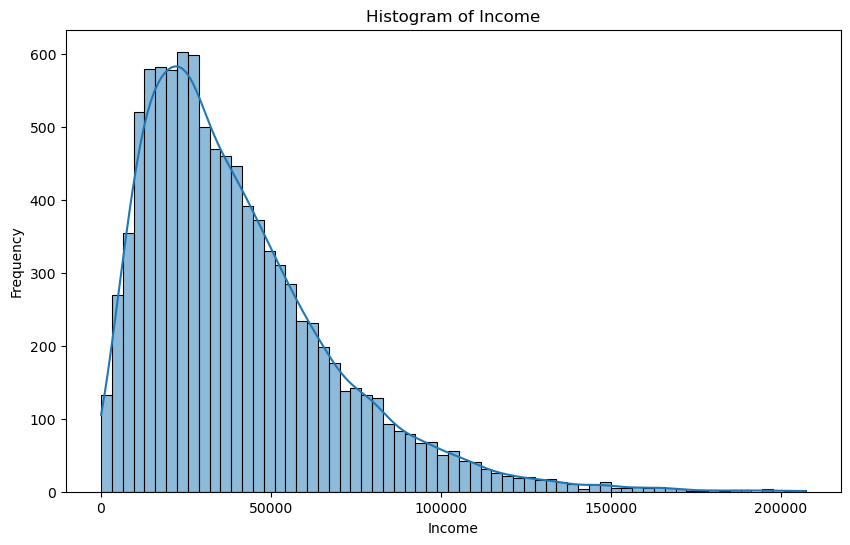

In [45]:
income_mean = df['Income'].mean()
income_median = df['Income'].median()
income_std = df['Income'].std()

print('Income Statistics')
print('Mean: ', income_mean)
print('Median: ', income_median)
print('Standard Deviation: ', income_std)

plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], kde=True)
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

Age Statistics
Mean:  53.5117
Median:  53.0
Standard Deviation:  20.638538175844857


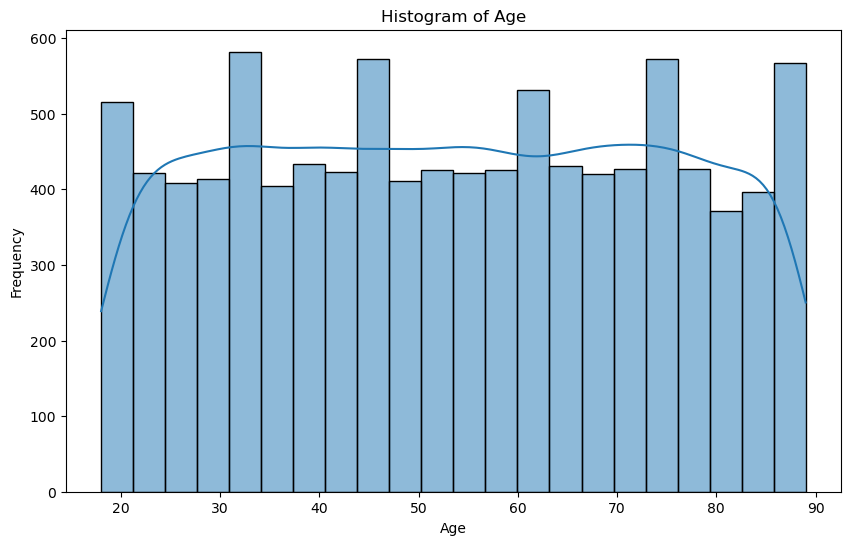

In [46]:
age_mean = df['Age'].mean()
age_median = df['Age'].median()
age_std = df['Age'].std()

print('Age Statistics')
print('Mean: ', age_mean)
print('Median: ', age_median)
print('Standard Deviation: ', age_std)

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Categorical Variables: "Complication_risk" and "Asthma"

Frequency Distribution for Complication Risk: 
Medium    4517
High      3358
Low       2125
Name: Complication_risk, dtype: int64


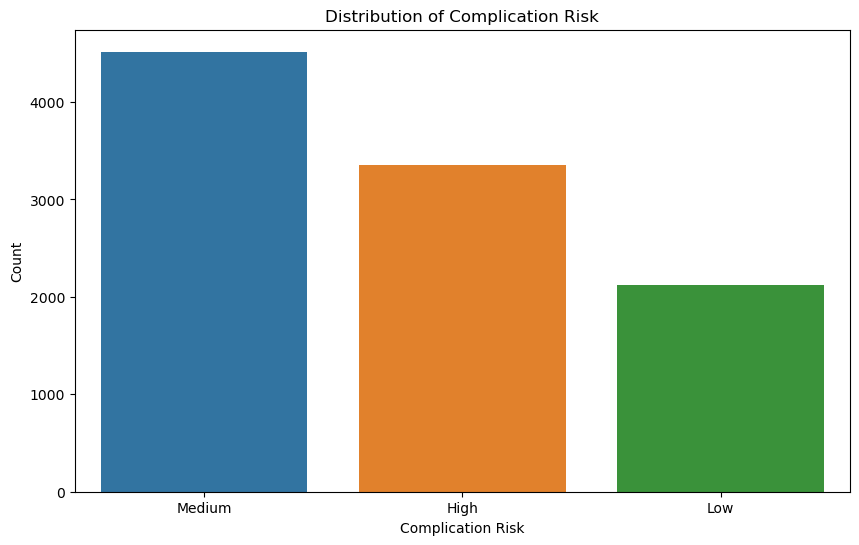

In [47]:
complication_risk_counts = df['Complication_risk'].value_counts()

print('Frequency Distribution for Complication Risk: ')
print(complication_risk_counts)

plt.figure(figsize=(10, 6))
sns.countplot(x='Complication_risk', data=df, order = df['Complication_risk'].value_counts().index)
plt.title('Distribution of Complication Risk')
plt.xlabel('Complication Risk')
plt.ylabel('Count')
plt.show()

Frequency Distribution for Asthma: 
No     7107
Yes    2893
Name: Asthma, dtype: int64


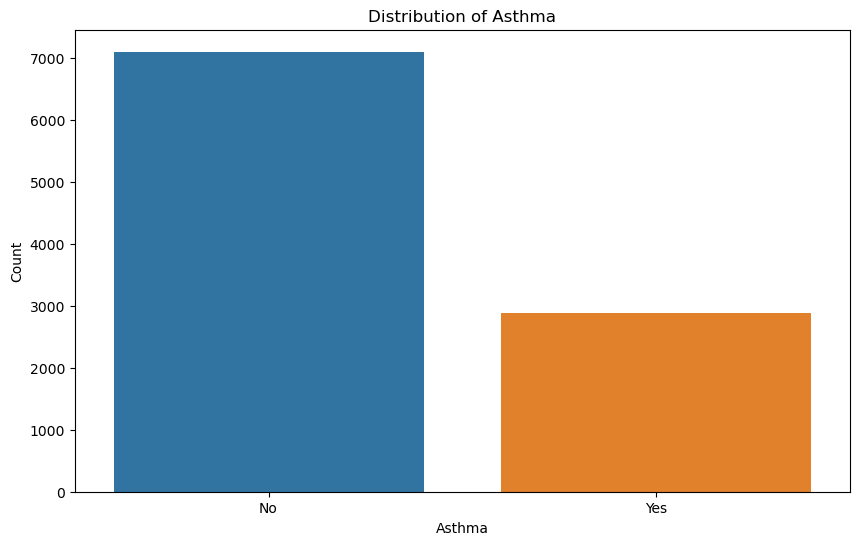

In [48]:
asthma_counts = df['Asthma'].value_counts()

print('Frequency Distribution for Asthma: ')
print(asthma_counts)

plt.figure(figsize=(10, 6))
sns.countplot(x='Asthma', data=df, order = df['Asthma'].value_counts().index)
plt.title('Distribution of Asthma')
plt.xlabel('Asthma')
plt.ylabel('Count')
plt.show()

## D.  Distribution Using Bivariate Statistics

### D1: Visual Representation of Findings

#### Continuous-Continuous Pair: "Income" and "Age"

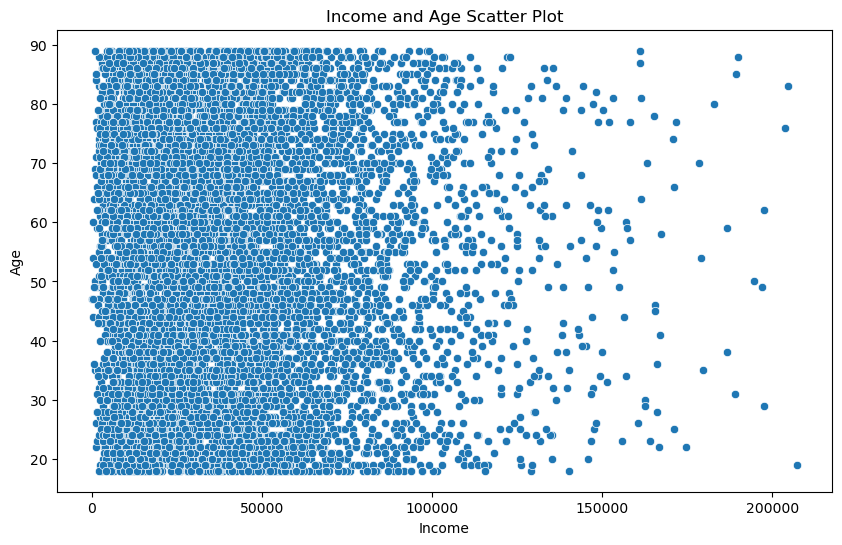

Correlation coefficient between Income and Age:  -0.012228139108096251


In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Income'], y=df['Age'])
plt.title('Income and Age Scatter Plot')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

continuous_pair_corr = df['Income'].corr(df['Age'])
print('Correlation coefficient between Income and Age: ', continuous_pair_corr)

- Income and Age
    - In the scatter plot, we see no discernible pattern or trends, leading us to believe that there is no obvious correlation between the two continuous variables. The correlation coefficient being close to 0 and far from 1 or -1 also leads us to believe that there isn't a strong linear correlation between these two continuous variables.

#### Continuous-Categorical Pair: "Income" and "Complication_risk"

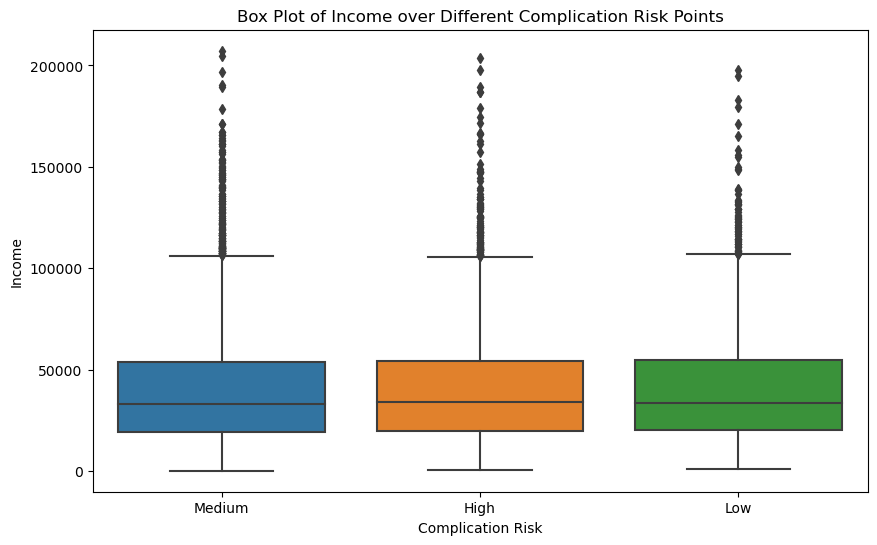

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Complication_risk', y='Income', data=df)
plt.title('Box Plot of Income over Different Complication Risk Points')
plt.xlabel('Complication Risk')
plt.ylabel('Income')
plt.show()

- Complication Risk and Income
    - The box plot visualization compares the income distributions between the different complication risk levels. From this visualization we can see that between the three groups the medians, outliers, and overall distributions are all similar. This can lead us to believe that there are not strong correlations between income and complication risks.

#### Continuous-Categorical Pair: "Age" and "Asthma"

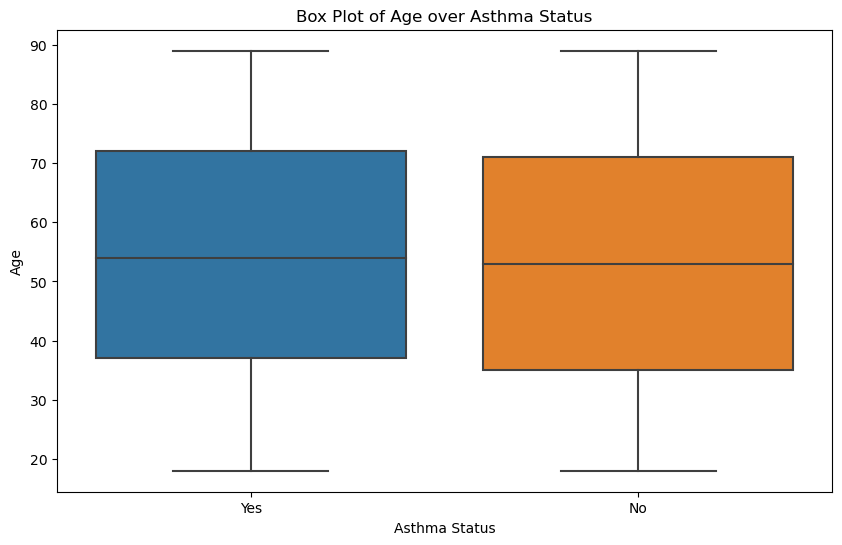

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Asthma', y='Age', data=df)
plt.title('Box Plot of Age over Asthma Status')
plt.xlabel('Asthma Status')
plt.ylabel('Age')
plt.show()

- Asthma and Age
    - The box plot visualizations compare the age distributions among a positive and negative asthma status. As seen in the visualization there is a strong similarity between the median, and overall distributions between the two status options. This can lead us to believe that age does not have a strong correlation to the asthma status of a patient and vice versa.

## E. Implications of Data Analysis

### E1: Results of the Hypothesis Test

- The research question proposed was: Is there a significant correlation between income levels and the assessed complication risk of a patient? 

- The null hypothesis is that there is no statistically significant difference in incomes across different complication risks. 

- The ANOVA test performed to explore the relationship between income levels and complication risk categories (Low, Medium, High) yielded an F-statistic of 0.29 and a p-value of 0.75. These results suggest that there is no statistically significant difference in the average income across different complication risk levels. The analysis indicates that income level does not vary significantly with the assessed complication risk of patients in the dataset.

### E2: Limitations of Data Analysis

- Sample Representation: The dataset may not represent the entire population, and findings might be specific to the sample used.

- Causality Limitation: The analysis is observational and cannot establish causation, only association.

- Statistical Power: The test's power to detect a difference, if one exists, depends on the sample size and variance within the groups, which could limit the results. If the sample size is inadequate or the variance is misrepresented by the sample, this could limit the results of the analysis.

### E3: Recommended Course of Action based on Results

- Research Question:
    - Is there a significant correlation between income levels and the assessed complication risk of a patient?
    
- No, there is not a significant correlation between income levels and the assessed complication risk of a patient.

- Considering the lack of significant findings, it would be beneficial to explore additional variables that may correlate with complication risk, such as marital status, gender, vitamin D levels, soft drink preference, being overweight, etc.

- Future studies and datasets should consider collecting more diverse data, gathering a larger representation of the population, or including more potential risk factors as variables for a more in-depth analysis.

## F. Panopto

- D207 Panopto Recording
    - Attached in submission
    
## G. Web Sources

- No web sources were used in this analysis.

## H. Other Sources

- No other sources were used in this analysis.